# Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :
x˙ 1 = x1(α − βx2)
x˙ 2 = −x2(γ − δx1)
où x1 et x2 désignent le nombre (positif) de proies et de prédateurs respectivement
et α, β, γ, δ sont des paramètres strictement positifs.


# Question 1

$x_1$ représente le nombre de proies, $x_2$ le nombre de prédateurs \
$\alpha$ représente le taux de reproduction des proies \
$\beta$ représente le taux de décès dus aux prédateurs \
$\gamma$ représente la proportion de prédateurs décédant par sélection naturelle \
$\delta$ représente la capacité reproductive des prédateurs grâce aux proies 

Soit $f(x_1, x_2) = (x_1(\alpha - \beta x_2), -x_2(\gamma - \delta x_1))$ \
On appelle point d'équilibre les points $(x_1, x_2)$ tels que $f(x_1, x_2) = 0$ \
On a alors $(0, 0)$ comme point d'équilibre immédiat \
Le 2eme point s'obtient en résolvant 

$\begin{cases}
\alpha - \beta x_2 =0 \\
\gamma - \delta x_1 =0
\end{cases}$ \
On obtient alors $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta}) \in \mathbb{R} _+^* \times \mathbb{R} _+^*$ 
Pour discuter de la stabilité de ces points on écrit la matrice jacobienne de f en tout point $(x_1, x_2)$ \
$J_f(x) = \begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & -\gamma + \delta x_1
\end{pmatrix}$

En $x = (0,0)$ on a $J_f(x) = \begin{pmatrix}
\alpha  & 0 \\
0 & -\gamma 
\end{pmatrix}$ \
Les valeurs propres de cette matrice sont  $\alpha > 0$ et $-\gamma < 0$ 
Donc d'après le lien entre stabilité et stabilité du linéarisé tangent, $(0, 0)$ est un point d'équilibre instable.\
En $\bar{x}$ on a $J_f(\bar{x}) = \begin{pmatrix} 
\ 0 & -\beta \gamma /\delta \\
\delta \alpha / \beta & 0
\end{pmatrix}$

On écrit le polynôme caractéristique :
$\chi(J_f(\bar{x}))(\lambda) = \lambda ^2 + \alpha \gamma$ 

Les racines de ce polynôme caractéristique sont à parties réelles nulles donc on ne peut pas conclure avec le lien entre stabilité et stabilité du linéarisé tangent.

# Question 2

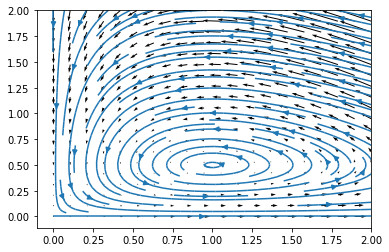

In [2]:
import numpy as np
import matplotlib.pyplot as plt
alpha = 0.1
beta = 0.2
gamma = 0.1
delta = 0.1
def f(x,y):
    return x*(alpha - beta*y), -y*(gamma - delta * x)
x, y = np.meshgrid(np.linspace(0, 2, 20), np.linspace(0, 2, 20))
dx, dy = f(x, y)
plt.quiver(x, y, dx, dy)
plt.streamplot(x,y,dx,dy)
show()

 # Question 3

# Question 4

Calculons la dérivée de H par rapport à t\
$(H \circ x )' = \delta \dot{x_1}  - \gamma \frac {\dot{x_1}}{x_1} + \beta \dot{x_2}  - \alpha \frac {\dot{x_2}}{x_2}$

# Question 5

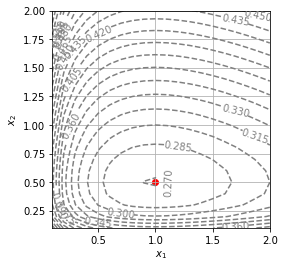

In [13]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
def H(x,y):
    return(delta*x - gamma * np.log(x) + beta*y - alpha*np.log(y))

display_contour(H, np.linspace(0.1,2,20), np.linspace(0.1,2,20), 20)
plt.scatter(np.array([gamma/delta]), np.array([alpha/beta]), color ='red')
plt.show()

$\bar{x}$ se trouve au centre des lignes de niveau concentriques \
On en conclut que ce point d'équilibre est stable

# Question 6

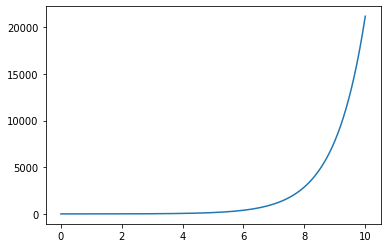

In [15]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        t.append(t[-1] + dt)
        x.append(x[-1] + dt * f(t, x[-1]))
    t,x = np.array(t), np.array(x)
    return t, x

def exp(t,x):
    return x
sol = solve_euler_explicit(exp, np.array([1]), 0.01, 0, 10)
plt.plot(sol[0], sol[1])
plt.show()

# Question 7 

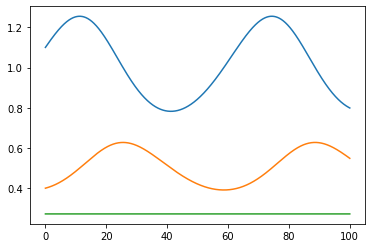

In [17]:
def f(t, X):
    return np.array([X[0]*(alpha - beta*X[1]), -X[1]*(gamma - delta * X[0])])

sol = solve_euler_explicit(f, np.array([1.1 ,0.4]), 0.001, 0, 100)

plt.plot(sol[0], sol[1])
plt.plot(sol[0], H(sol[1][:,0], sol[1][:,1]))
plt.show()

# Question 8

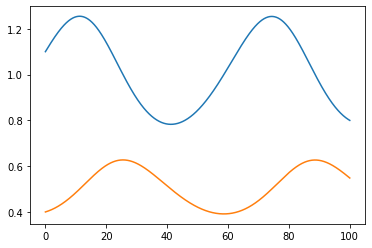

In [18]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = [t0]
    x = [x0]
    while t[-1] < tf:
        t.append(t[-1] + dt)
        new_x = x[-1]
        for k in range(itermax):
            new_x = x[-1] + dt*f(t[-1], new_x)
        x.append(new_x)
    t,x = np.array(t), np.array(x)
    return t, x
sol = solve_euler_implicit(f, np.array([1.1 ,0.4]), 0.01, 0, 100)

plt.plot(sol[0], sol[1])

plt.show()

# Question 9 

D'après la Question 9, on a $(H \circ x )' = \delta \dot{x_1}  - \gamma \frac {\dot{x_1}}{x_1} + \beta \dot{x_2}  - \alpha \frac {\dot{x_2}}{x_2}$ \
En prenant $x_1$ et $x_2$ solutions des équations de Lotka-Volterra, alors on obtient $(H \circ x)' = 0$, donc $\forall t,  H(x(t)) = H(x(0))$ et $H(x_1, x_2) - H_0 = 0$ \
Les solutions de Lokta-Volterra sont donc solutions du système. Réciproquement, si ce sytème est vrai pour tout u continûement différentiable, on peut choisir la fonction nulle et on a alors $x_1$ et $x_2$ solutions de Lokta-Volterra

# Question 10

# Question 11